In [5]:
# to avoid warnings
from transformers.utils import logging
logging.set_verbosity_error()

In [7]:
from transformers import pipeline

#object detection

od_pipe = pipeline(task = "object-detection", model = "facebook/detr-resnet-50")

print(f"object detection pipeline is: {od_pipe} in memory address.")

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

object detection pipeline is: <transformers.pipelines.object_detection.ObjectDetectionPipeline object at 0x0000018980011160> in memory address.


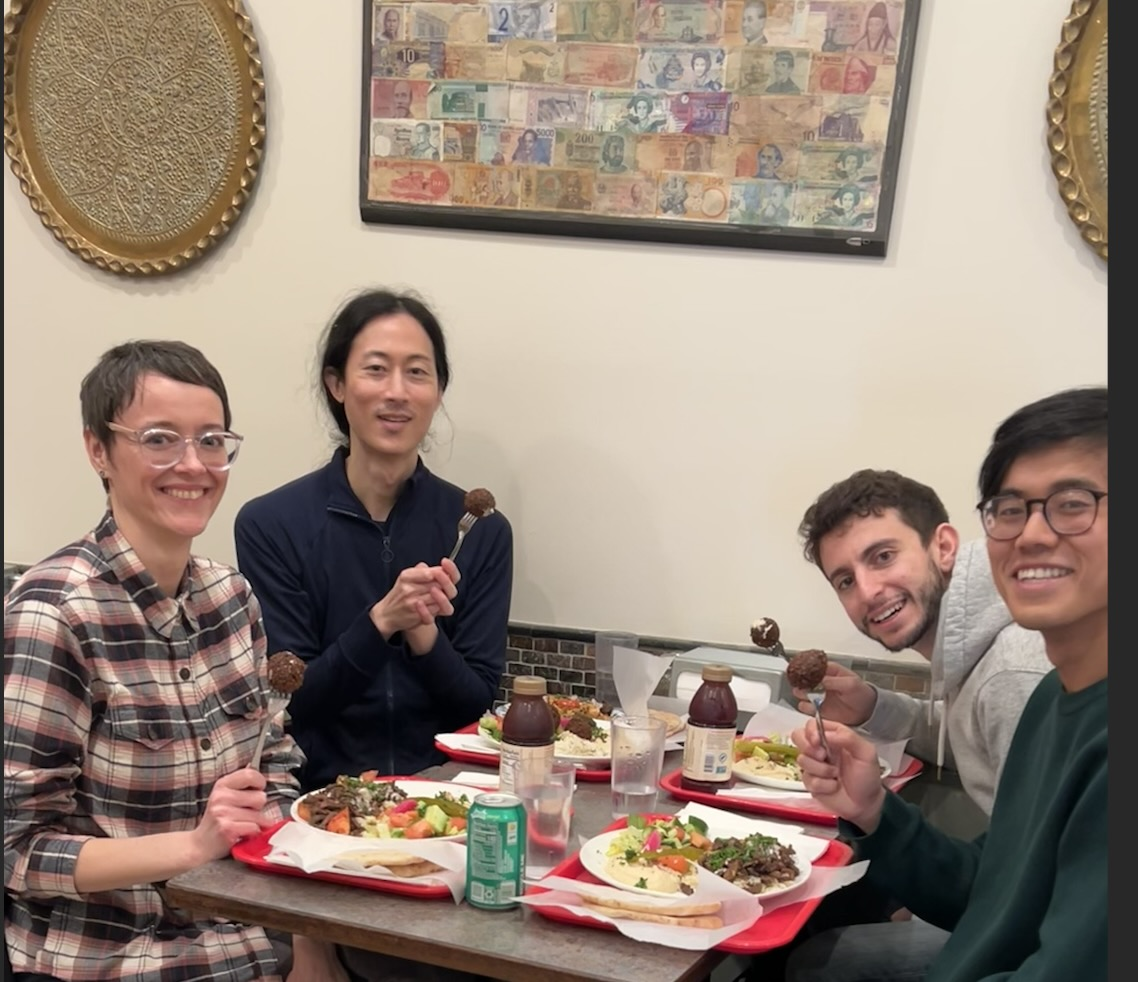

In [8]:
from PIL import Image
raw_image = Image.open('friends.jpg')
raw_image

In [9]:
pipeline_out = od_pipe(raw_image)

In [14]:
from helper import render_results_in_image

In [15]:
print(pipeline)
process_image = render_results_in_image(raw_image, pipeline_out)

<function pipeline at 0x00000189F7391580>


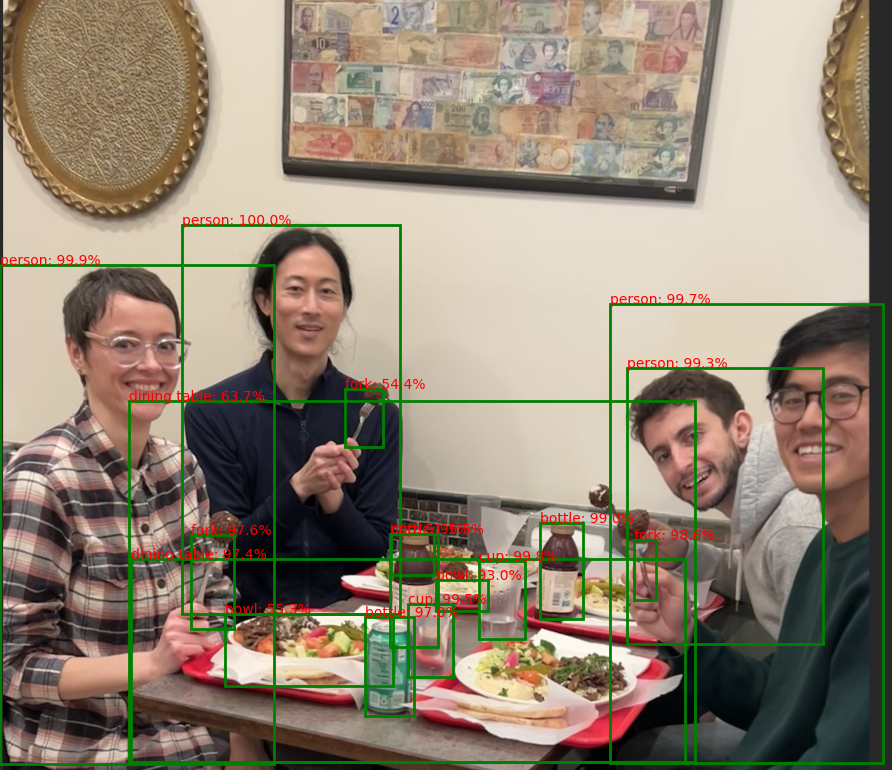

In [16]:
process_image

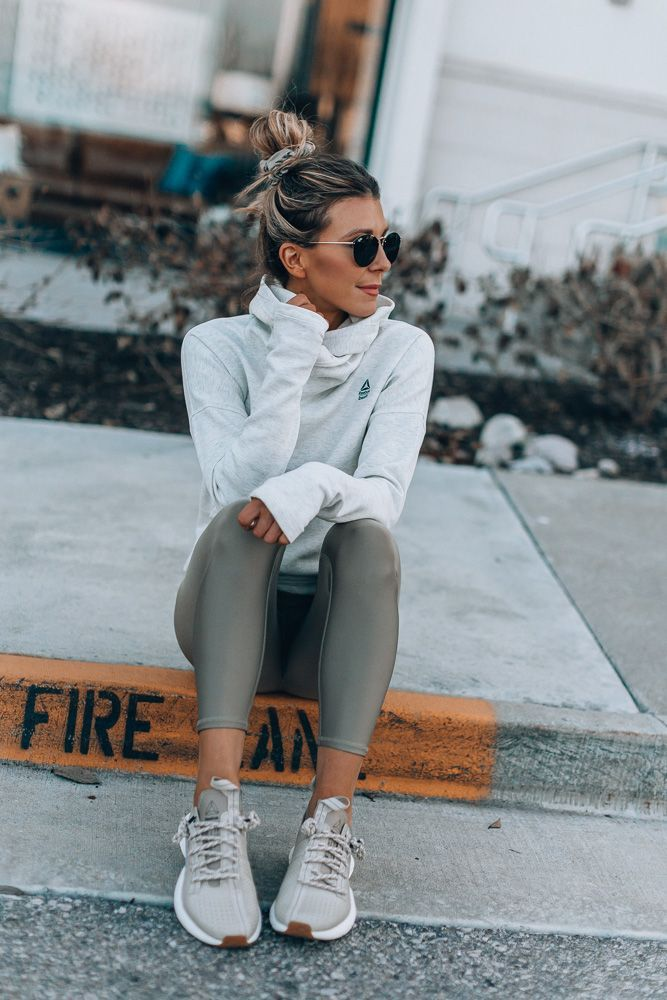

In [19]:
raw_img2 = Image.open('ad1.jpg')
raw_img2

In [20]:
output2 = od_pipe(raw_img2)


In [22]:
process_image2 = render_results_in_image(raw_img2, output2)

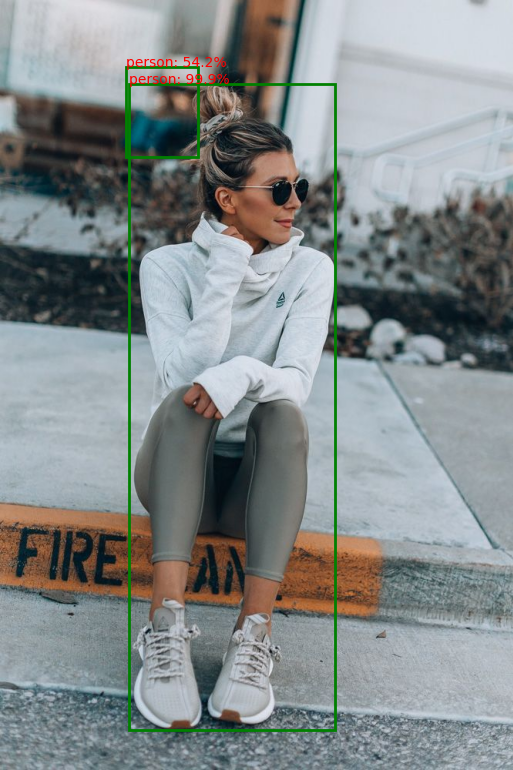

In [23]:
process_image2

In [24]:
import gradio as gr

In [25]:
def get_pipeline_prediction(pil_image):
    pipeline_out=od_pipe(pil_image)
    process_image = render_results_in_image(pil_image,pipeline_out)
    return process_image

In [26]:
demo = gr.Interface(
    fn=get_pipeline_prediction,
    inputs=gr.Image(label="Input image",
                   type="pil"),
    outputs=gr.Image(label="Output image with predicted instances",
                    type="pil")
)

In [27]:
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [29]:
output2

[{'score': 0.5420299172401428,
  'label': 'person',
  'box': {'xmin': 163, 'ymin': 86, 'xmax': 257, 'ymax': 203}},
 {'score': 0.9990969896316528,
  'label': 'person',
  'box': {'xmin': 167, 'ymin': 109, 'xmax': 434, 'ymax': 948}}]

In [32]:
 od_pipe

In [33]:
from helper import summarize_predictions_natural_language

In [34]:
text = summarize_predictions_natural_language(output2)

In [35]:
text


'In this image, there are two persons.'

In [36]:
from transformers import pipeline
tts_pipe = pipeline(task="text-to-speech", model="kakao-enterprise/vits-ljs")

In [37]:
narrated_text=tts_pipe(text)

RuntimeError: espeak not installed on your system

In [ ]:
 from IPython.display import Audio as IPythonAudio
IPythonAudio(narrated_text["audio"][0],
            rate=narrated_text["sampling_rate"])